In [1]:
import pickle
import pandas as pd
import numpy as np

In [2]:
df = pd.read_pickle("./sample.pkl").sort_values(by=["EPOCH"])
df['EPOCH'] = df['EPOCH'].astype('datetime64[ns]')
df = df.set_index("EPOCH")
df['rev_ma'] = df.MEAN_ANOMALY + df.REV_AT_EPOCH*360
df['rev_ma'] = df['rev_ma'].astype(int)
df['rev_ma'] = df.MEAN_ANOMALY + df.REV_AT_EPOCH*360
df['station'] = (df.REV_AT_EPOCH / df.MEAN_MOTION) - df.index.astype(np.int64) / 10**9 / 60 / 60 / 24
df['station2'] = df.station / (df.MEAN_MOTION ** 0.07)
df['station3'] = df.station / (df.MEAN_MOTION ** 0.065)
df['station4'] = df.station / (df.MEAN_MOTION ** 0.06)

In [3]:
def plot_stuff(n,idf):
    ax = idf[columns].plot(subplots=True,figsize=(20,30));
#     ax[-1].set_xticklabels(ax[-1].get_xticklabels(), rotation=90)
    ax[-1].figure.suptitle(n)

In [4]:
columns = [
    "MEAN_MOTION_DOT","MEAN_MOTION_DDOT","BSTAR",
    "INCLINATION","RA_OF_ASC_NODE","ECCENTRICITY","ARG_OF_PERICENTER","MEAN_ANOMALY","MEAN_MOTION","REV_AT_EPOCH",
    "APOAPSIS","PERIAPSIS",
    "rev_ma",
#     "station","station2","station3","station4",
]

In [6]:
df.NORAD_CAT_ID.unique()

array([12223, 16720, 25988, 26285])

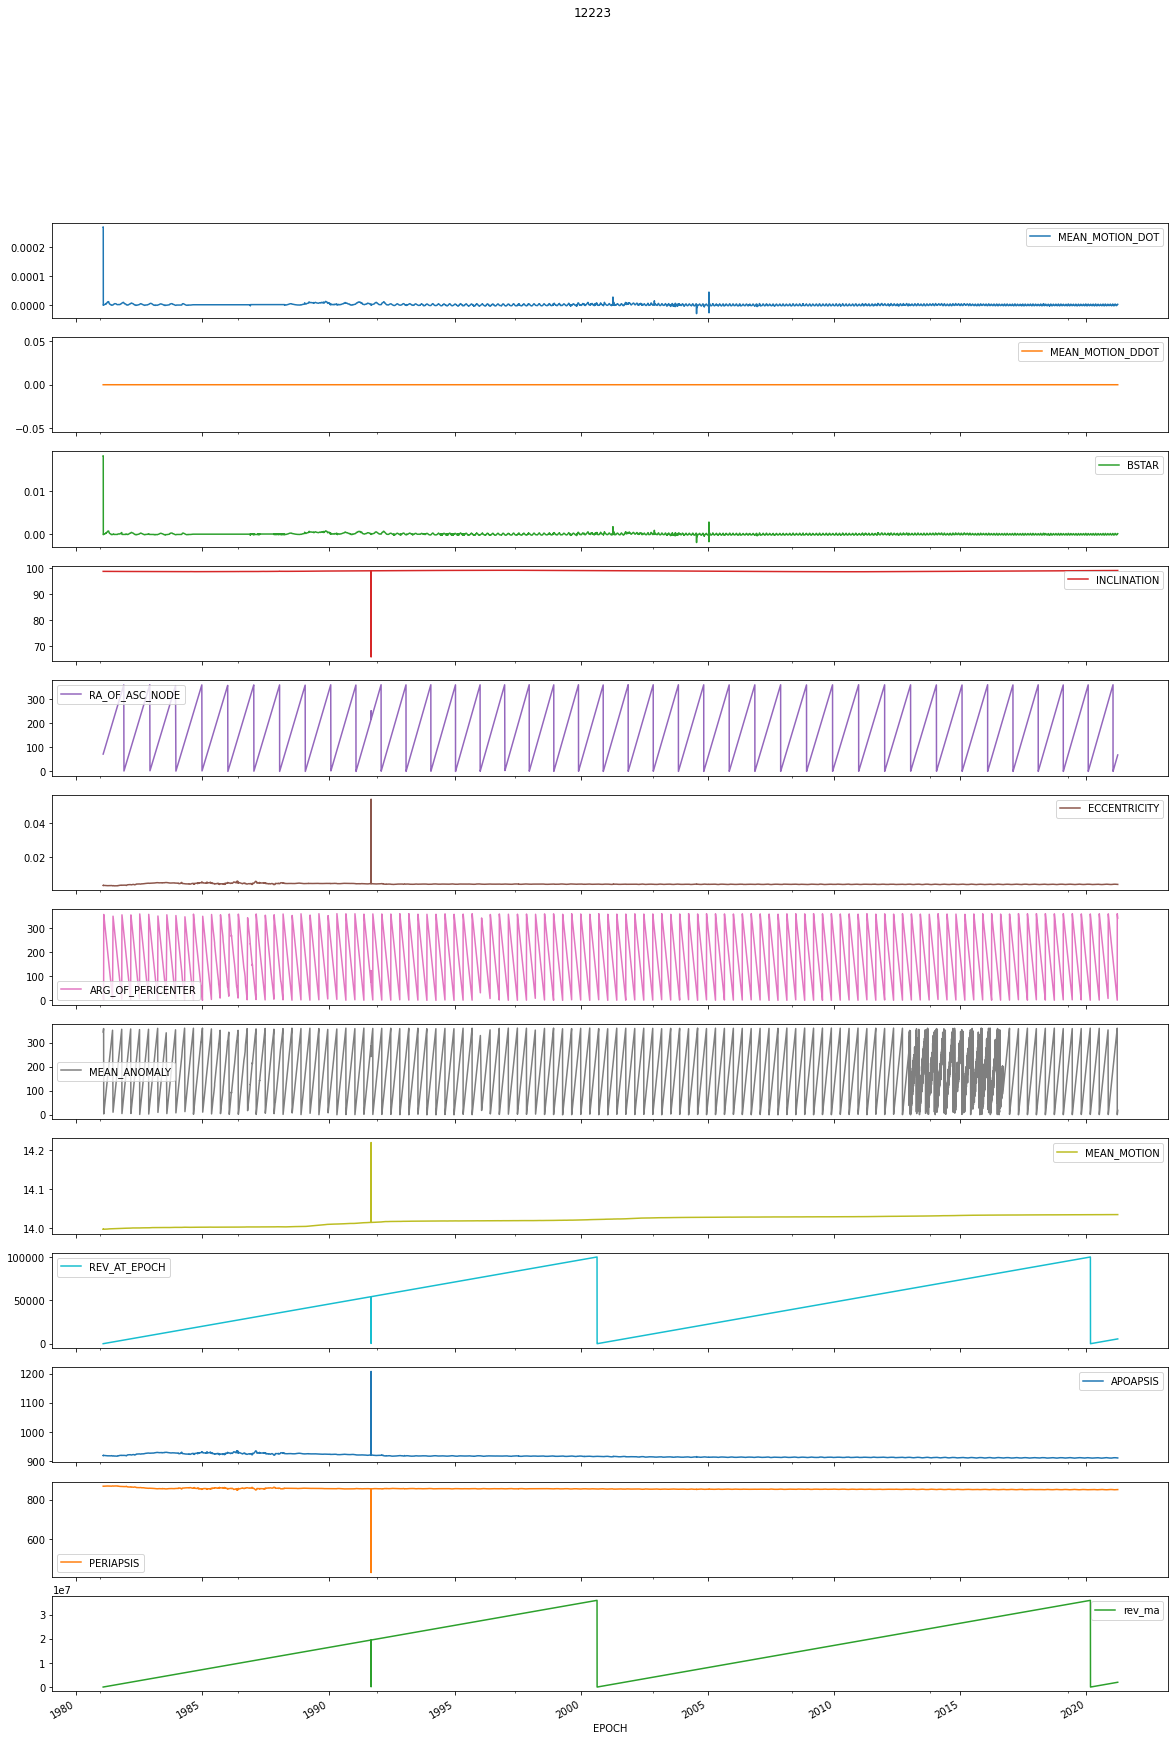

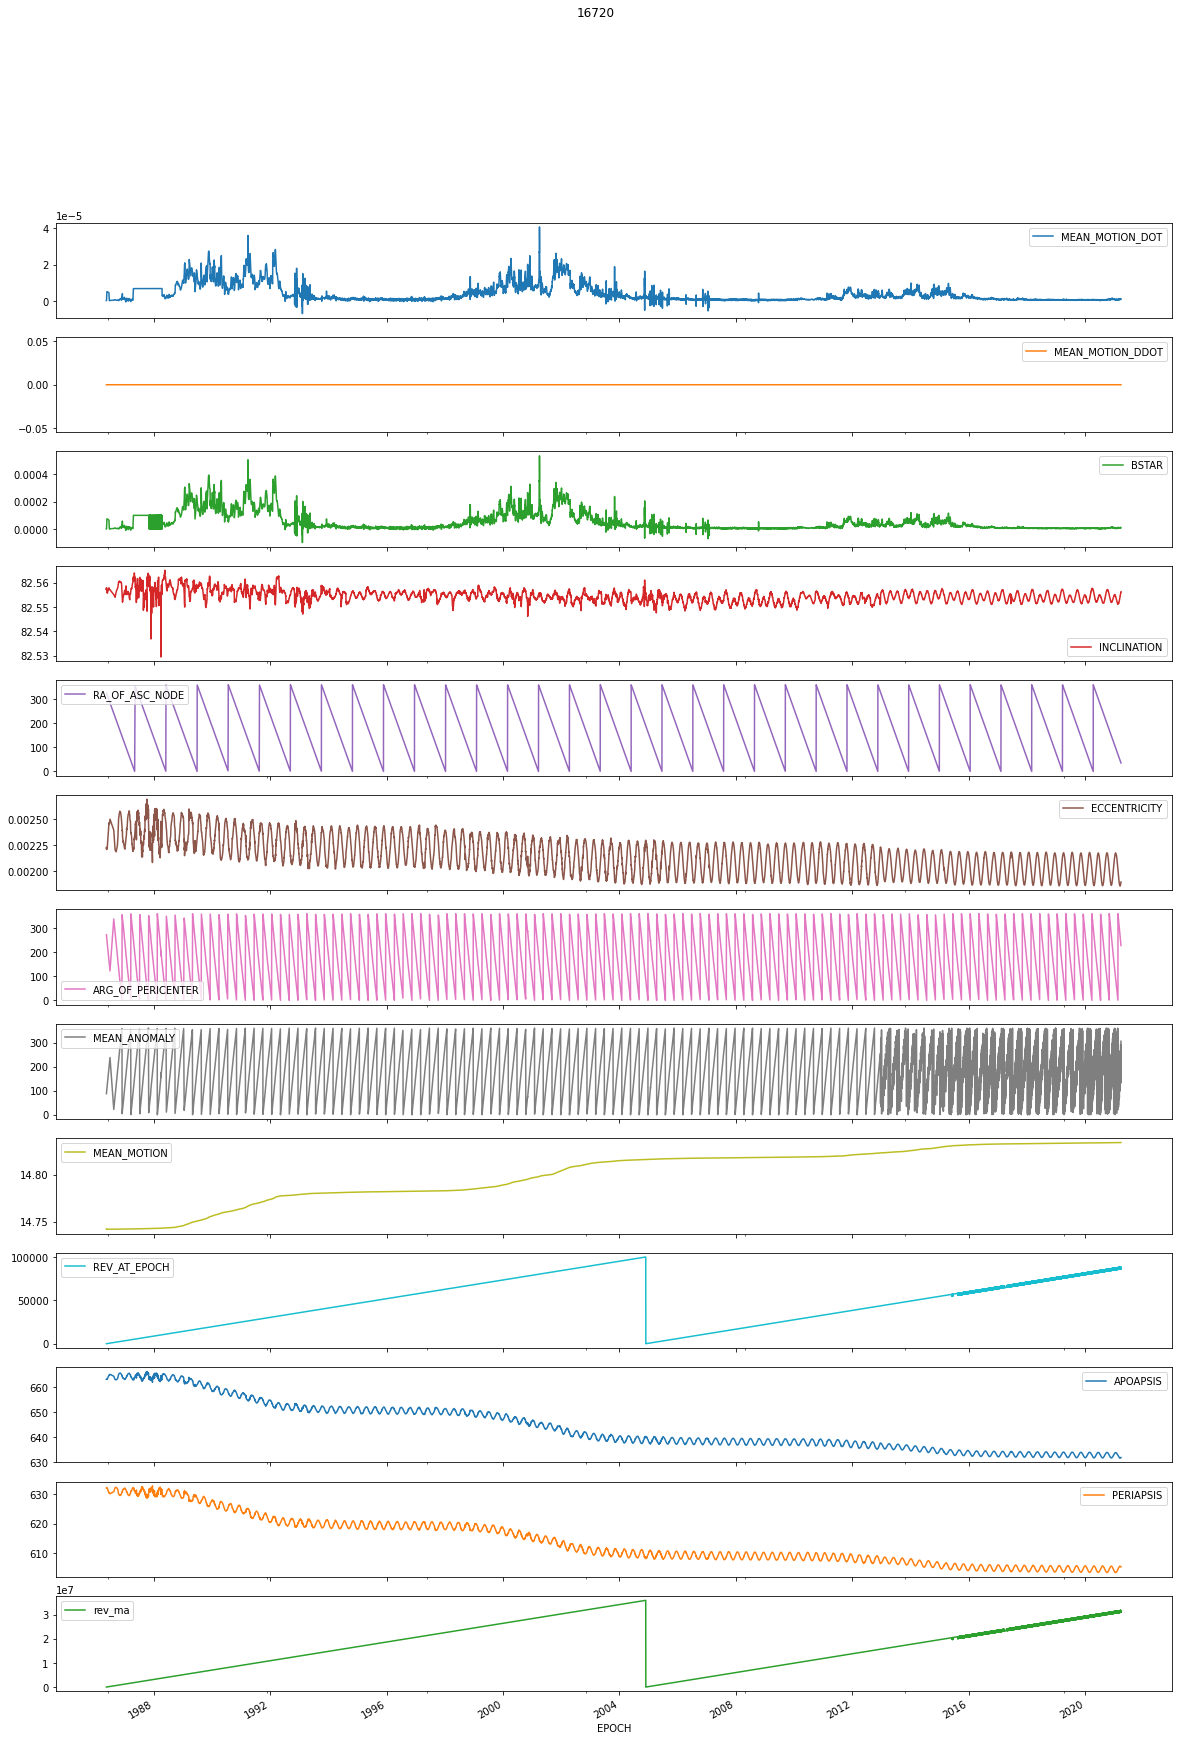

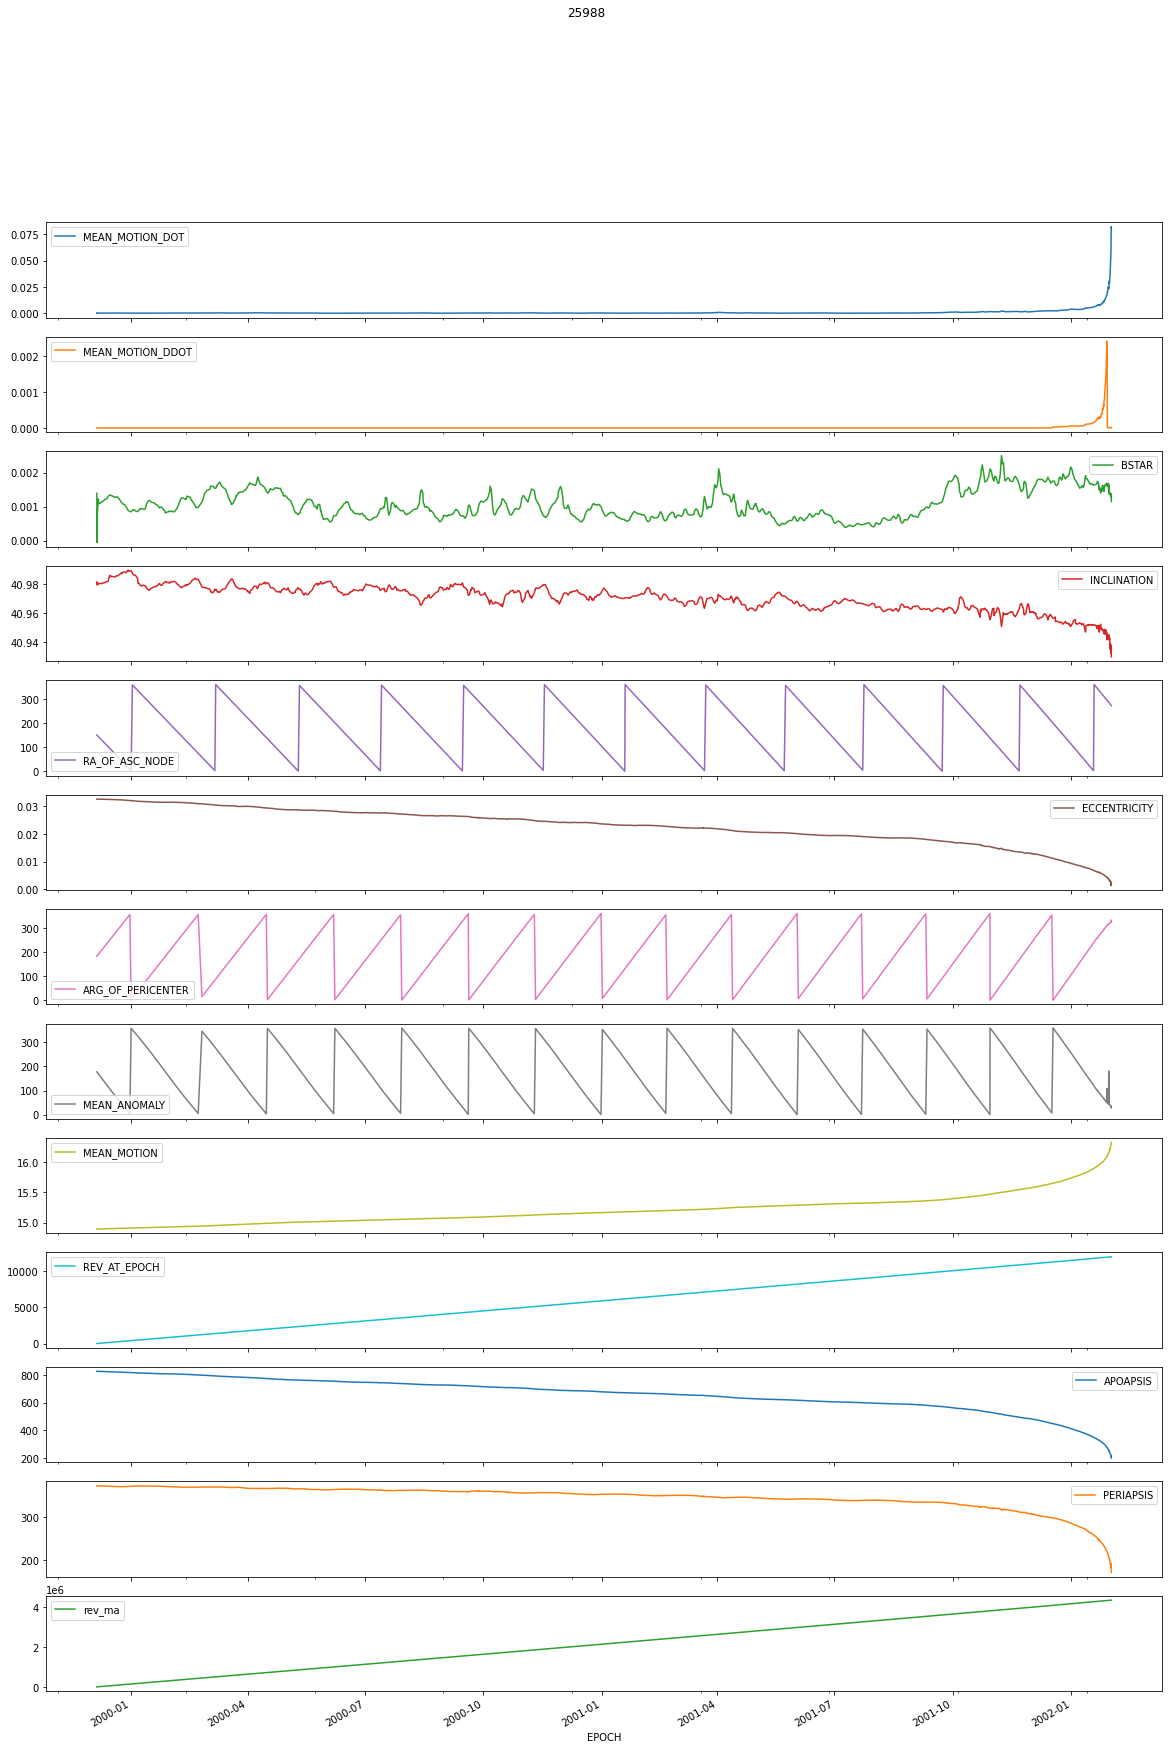

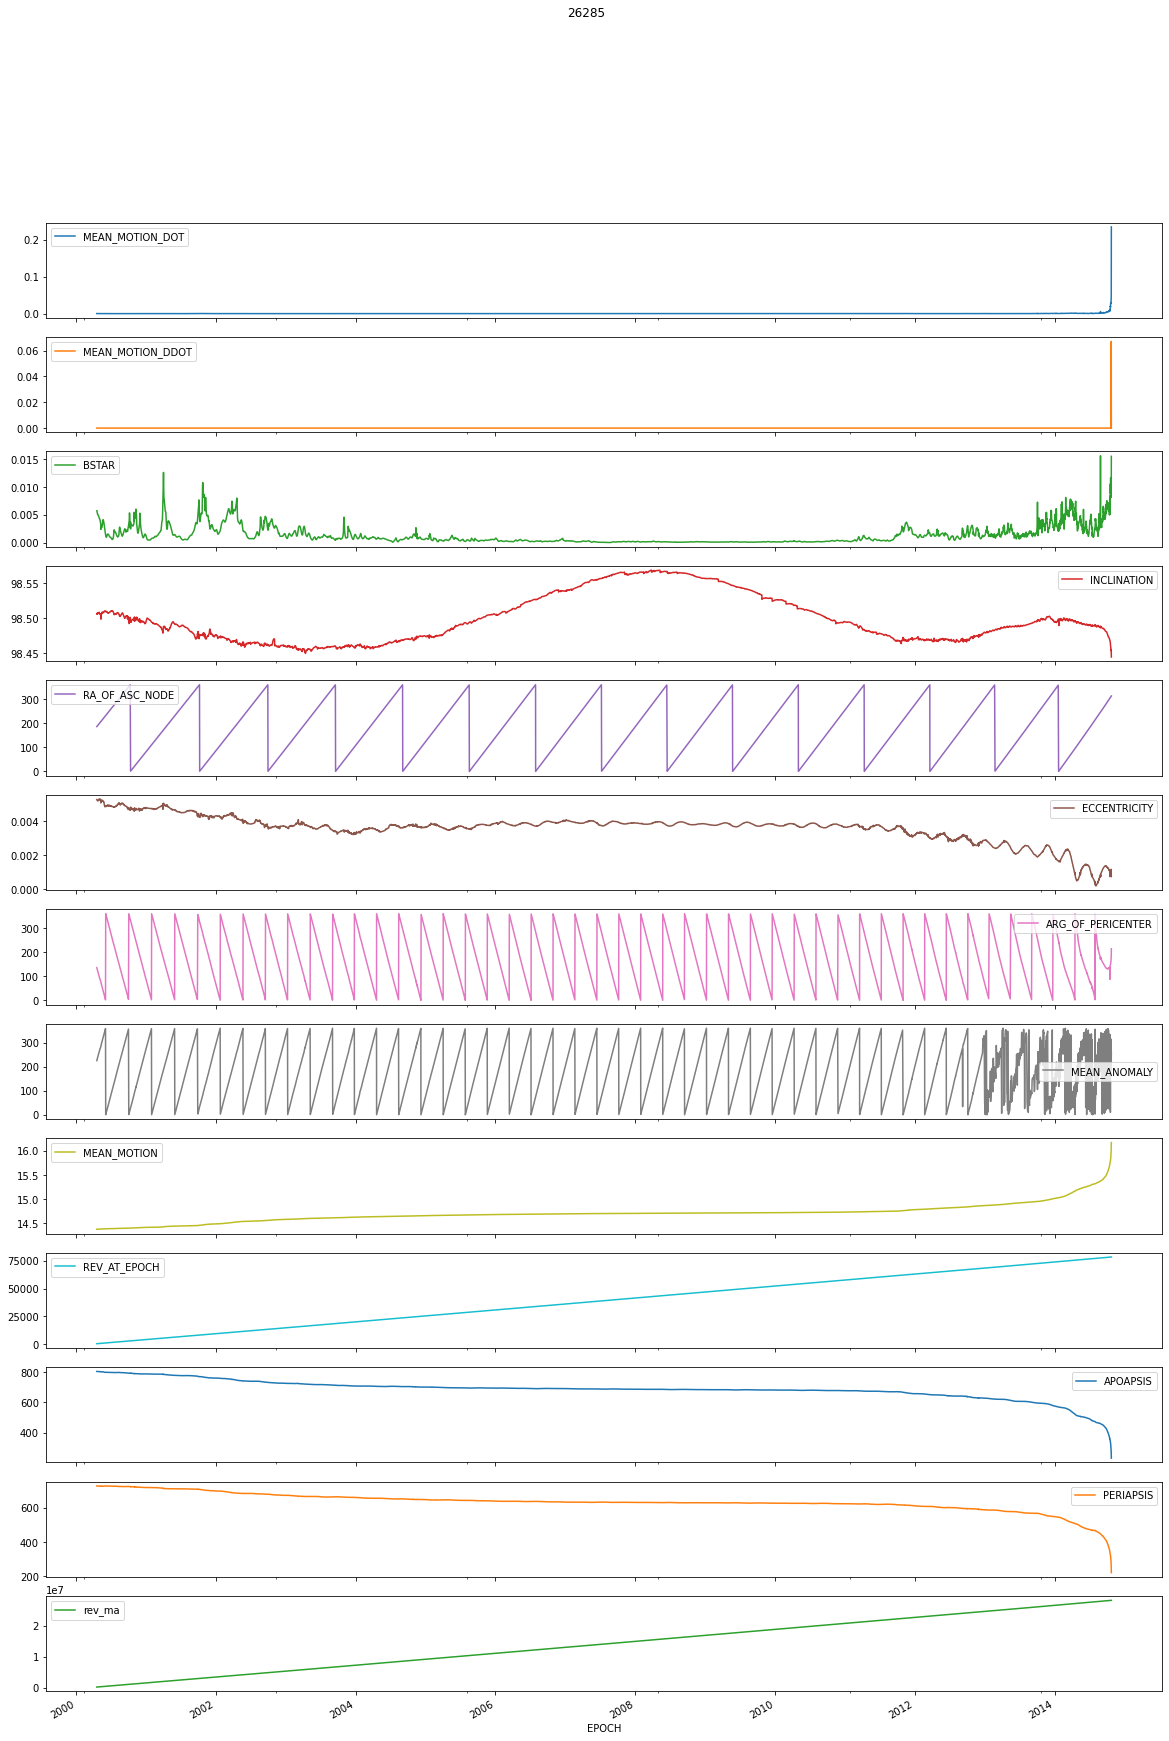

In [5]:
for norad_id, df1 in df.groupby("NORAD_CAT_ID"):
    plot_stuff(norad_id, df1)

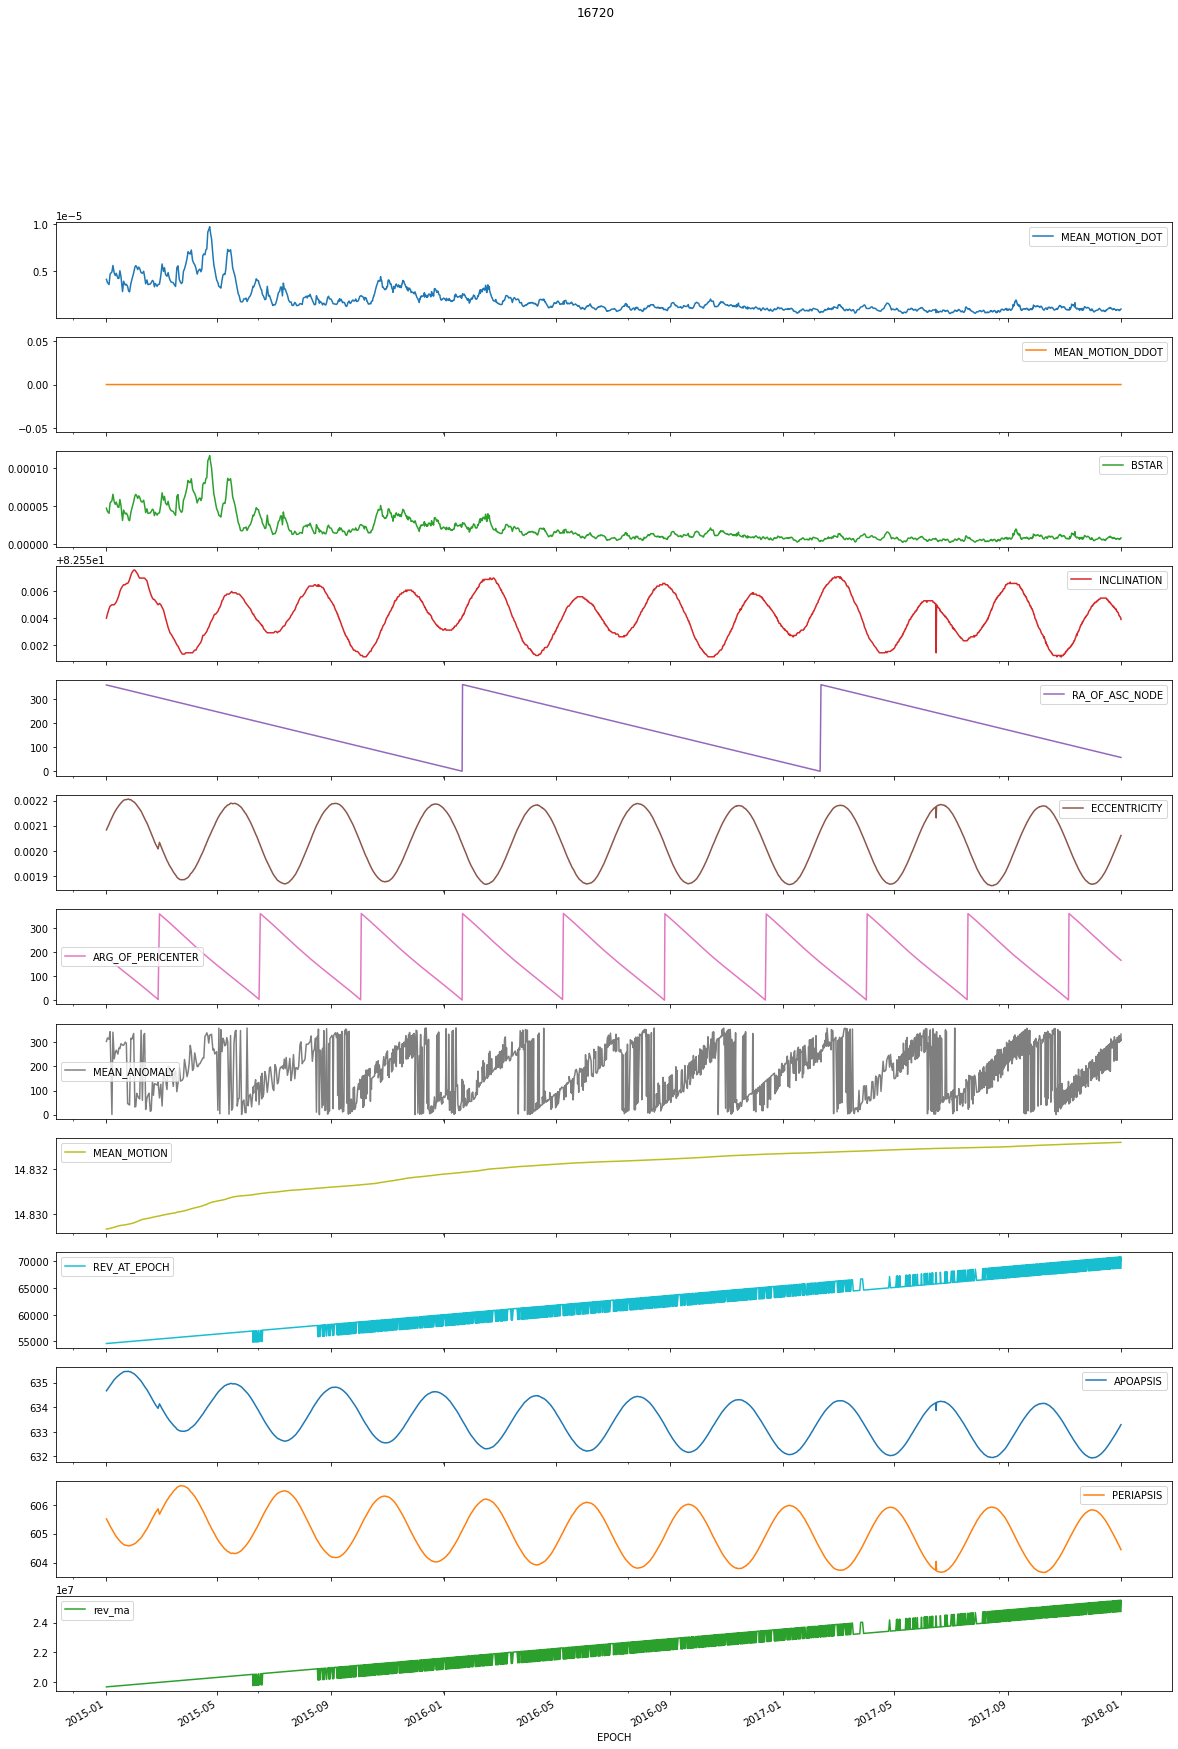

In [6]:
nid=16720
df1 = df[df.NORAD_CAT_ID==nid][columns]
df1 = df1[(df1.index > "2015") & (df1.index < "2018")]
plot_stuff(nid,df1)

In [7]:
df.reset_index().to_csv("sample.csv")

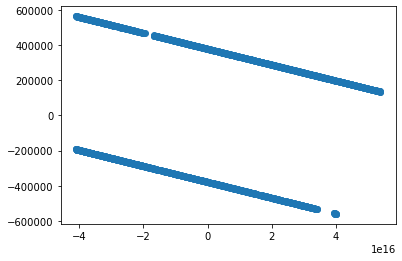

In [8]:
# Tried to use PCA here to separate this, but not possible due to the uneven distribution

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

df2 = df1[['rev_ma']].copy().reset_index()
df2['EPOCH'] = df2.EPOCH.astype(np.int64)
pca = PCA(n_components=2)
pca.fit(df2)
pcatest = pca.transform(df2)
import matplotlib.pyplot as plt
plt.scatter(pcatest.T[0], pcatest.T[1])

In [9]:
df2 = df[df.NORAD_CAT_ID==16720][columns].copy().reset_index()

# 10 rev error should be big enough
df2['test'] = (((df2.EPOCH.diff()/ np.timedelta64(1, 'D')) * df2.MEAN_MOTION) - df2.REV_AT_EPOCH.diff()) / 10
df2 = df2.fillna(1)
df2['test'] = df2.test.astype(int).astype(object)
df2.loc[(df2.test==0),'test'] = np.nan
df2['test'] = df2.test.fillna(method='ffill')
df2 = df2.set_index("EPOCH")
df2
# this works for this example, but the fillna(1) value doesn't match once it starts oscillating on other cases

,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,BSTAR,INCLINATION,RA_OF_ASC_NODE,ECCENTRICITY,ARG_OF_PERICENTER,MEAN_ANOMALY,MEAN_MOTION,REV_AT_EPOCH,APOAPSIS,PERIAPSIS,rev_ma,test
EPOCH,,,,,,,,,,,,,,
1986-05-15 10:41:50.000639,2.300000e-07,0.0,0.000000,82.5576,325.7802,0.002222,272.5191,87.5756,14.742015,3,663.303,632.083,1.167576e+03,1
1986-05-15 22:05:57.517439,2.300000e-07,0.0,0.000000,82.5570,325.3447,0.002230,269.6659,90.2125,14.741922,10,663.389,632.056,3.690213e+03,1
1986-05-16 04:36:54.850463,2.300000e-07,0.0,0.000000,82.5574,325.0938,0.002225,271.3283,88.5170,14.741906,14,663.362,632.094,5.128517e+03,1
1986-05-16 11:07:52.770144,2.300000e-07,0.0,0.000000,82.5579,324.8452,0.002217,268.4790,91.3886,14.741935,18,663.294,632.143,6.571389e+03,1
1986-05-21 19:49:12.897407,5.130000e-06,0.0,0.000074,82.5562,319.9204,0.002209,248.7895,110.4871,14.741920,97,663.244,632.202,3.503049e+04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-26 07:41:05.646336,9.500000e-07,0.0,0.000009,82.5561,36.5136,0.001889,232.0200,241.0978,14.834271,86247,631.746,605.313,3.104916e+07,210
2021-03-26 07:41:05.646336,9.500000e-07,0.0,0.000009,82.5561,36.5136,0.001889,232.0200,241.0978,14.834271,88356,631.746,605.313,3.180840e+07,-210
2021-03-26 22:00:33.451776,9.500000e-07,0.0,0.000009,82.5563,35.9571,0.001893,229.9341,188.5927,14.834272,86256,631.771,605.286,3.105235e+07,210


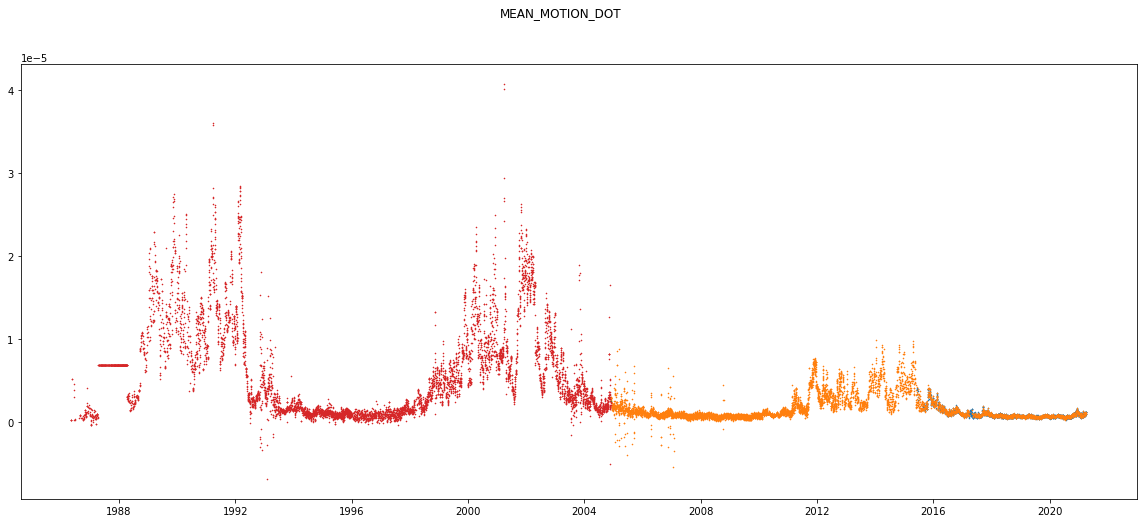

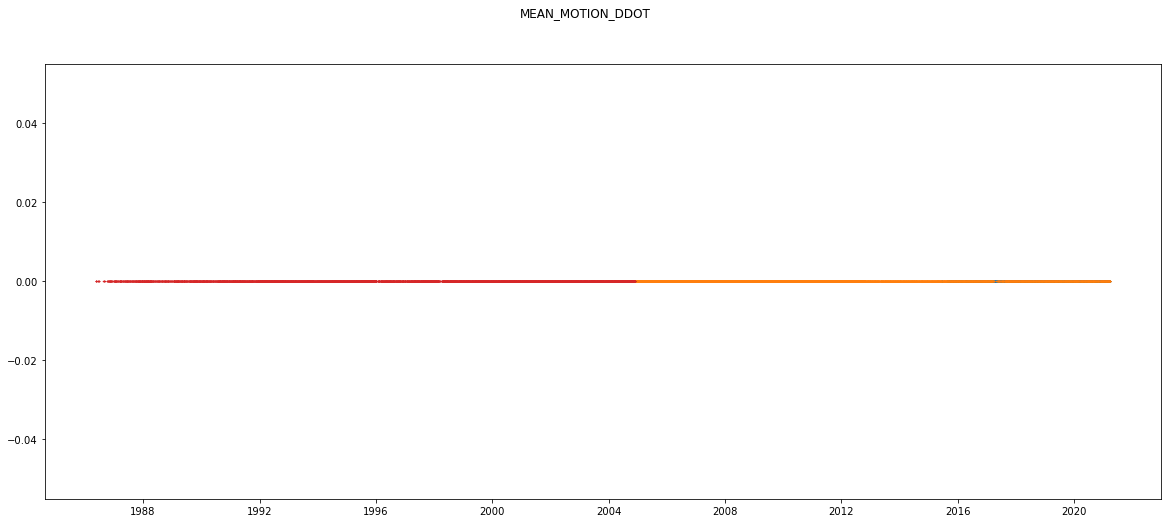

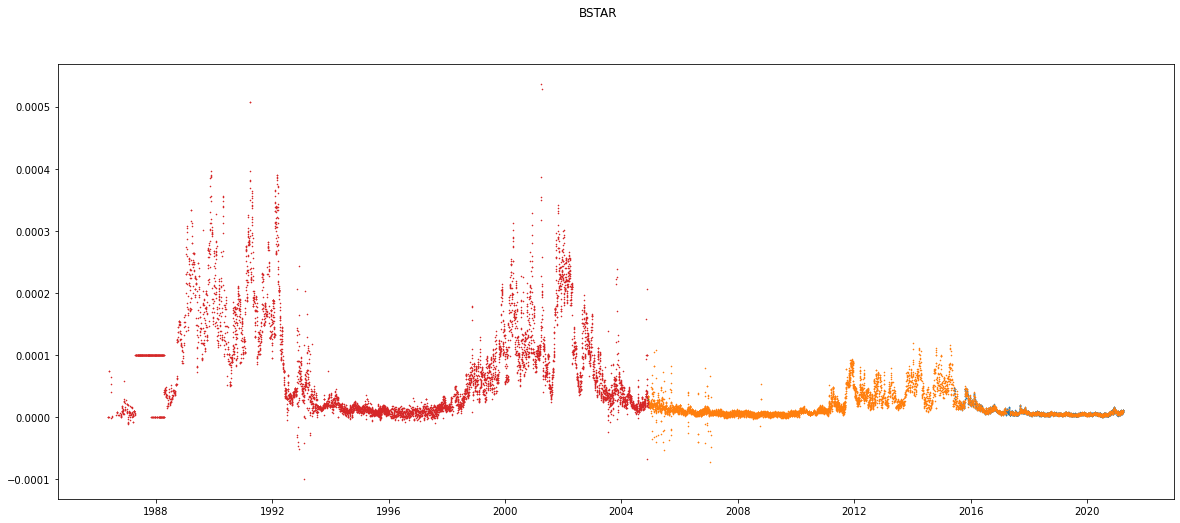

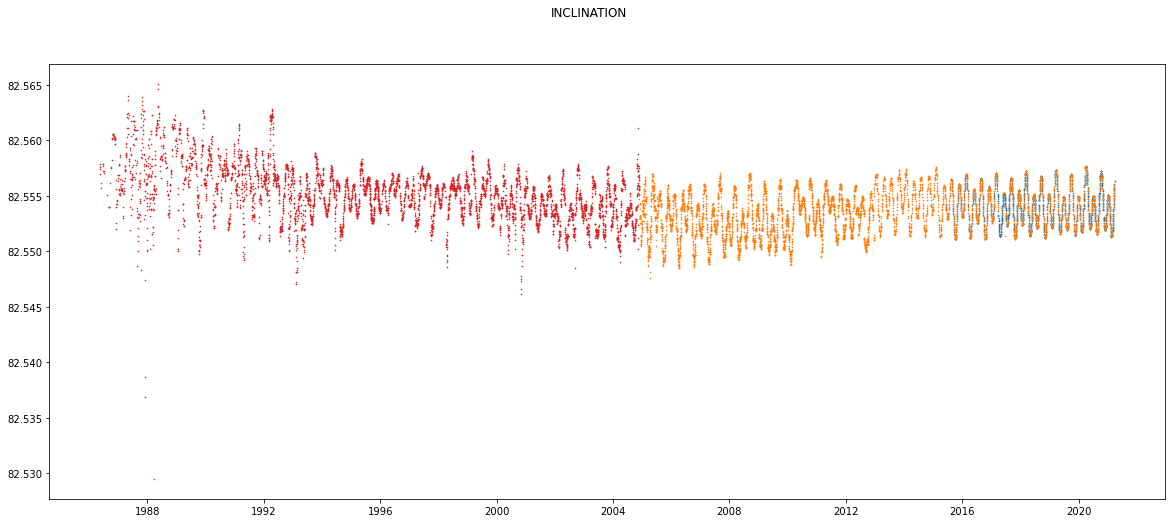

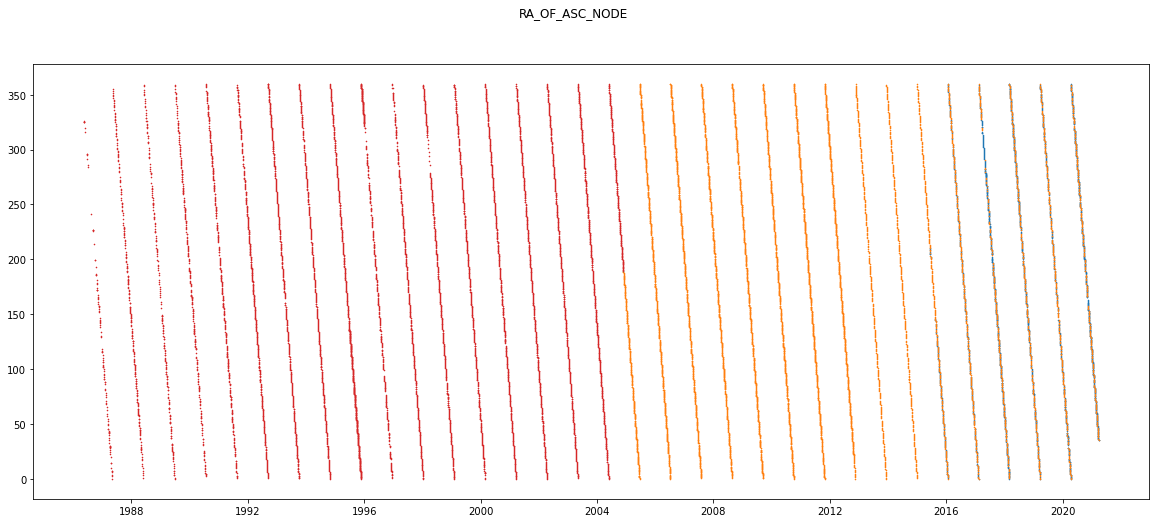

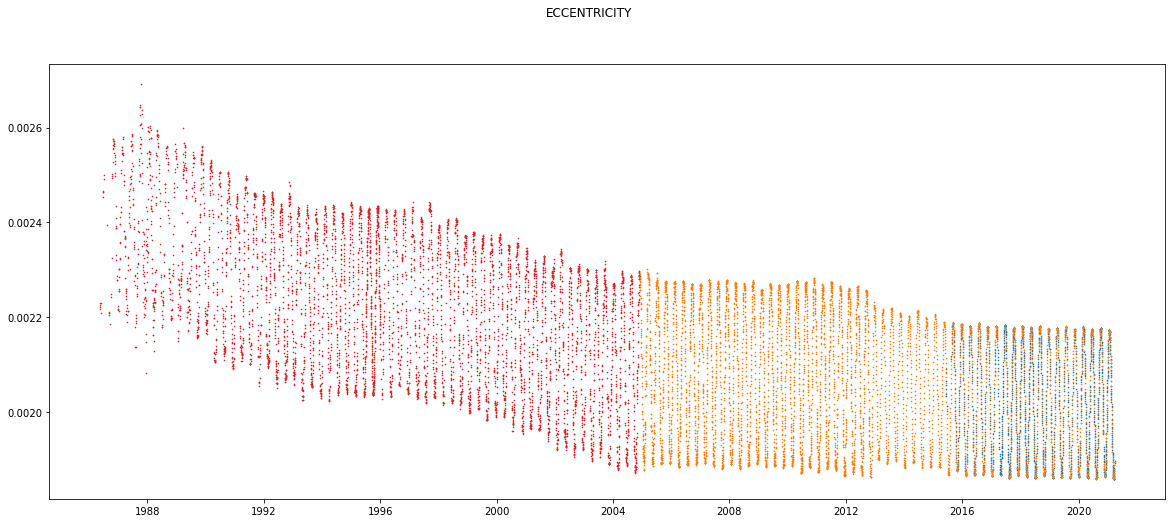

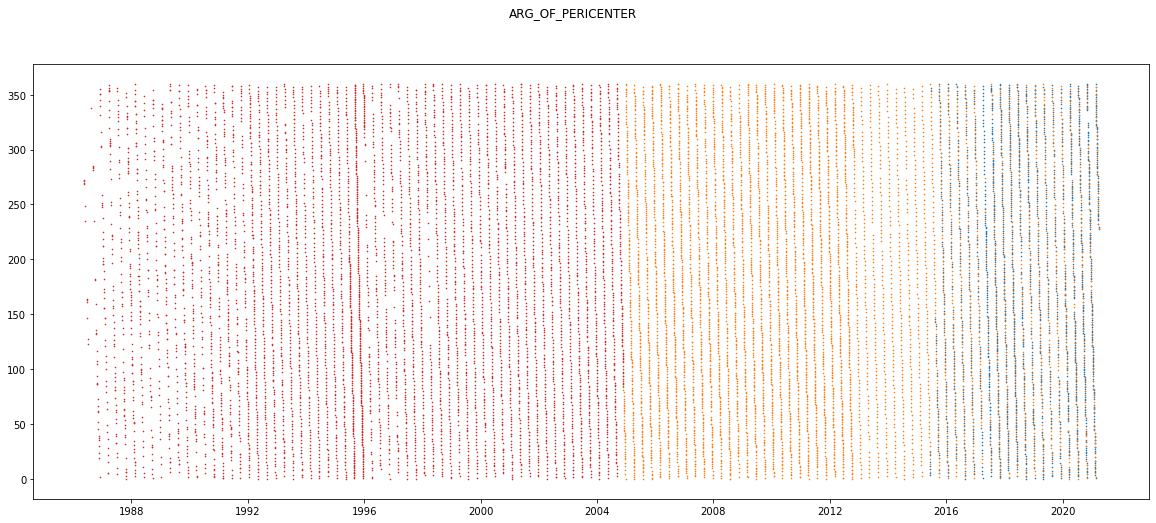

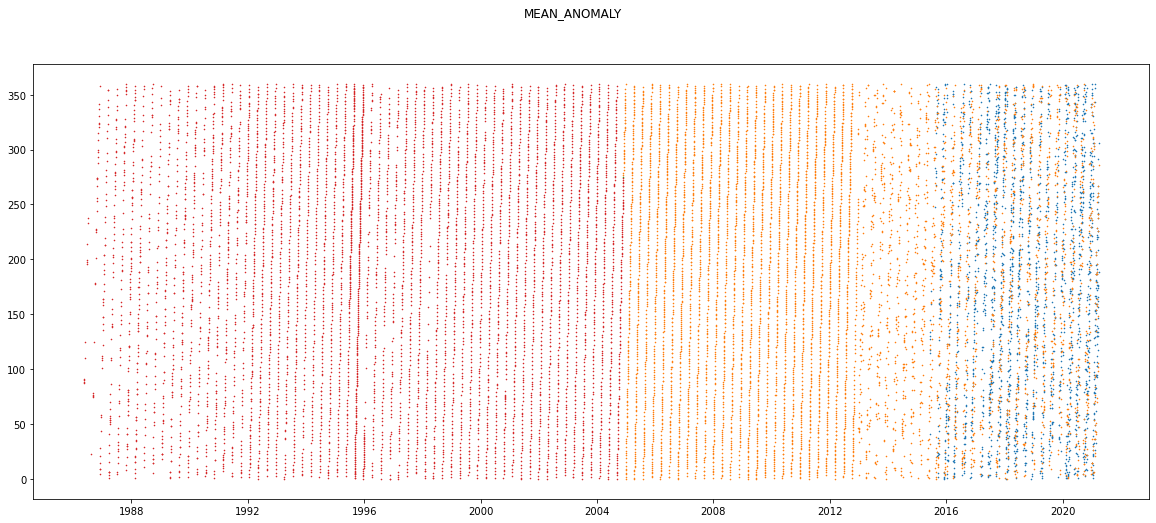

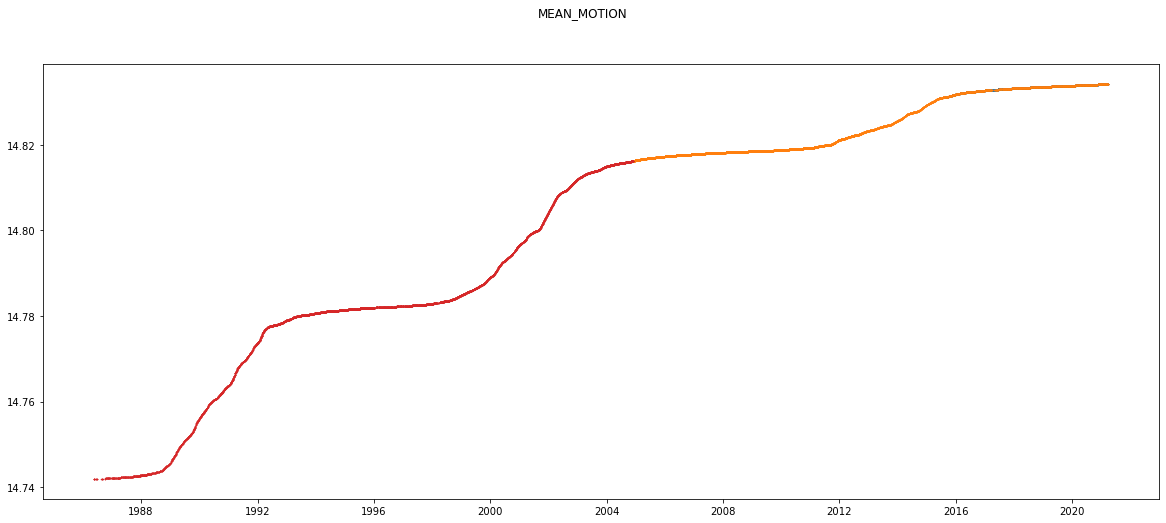

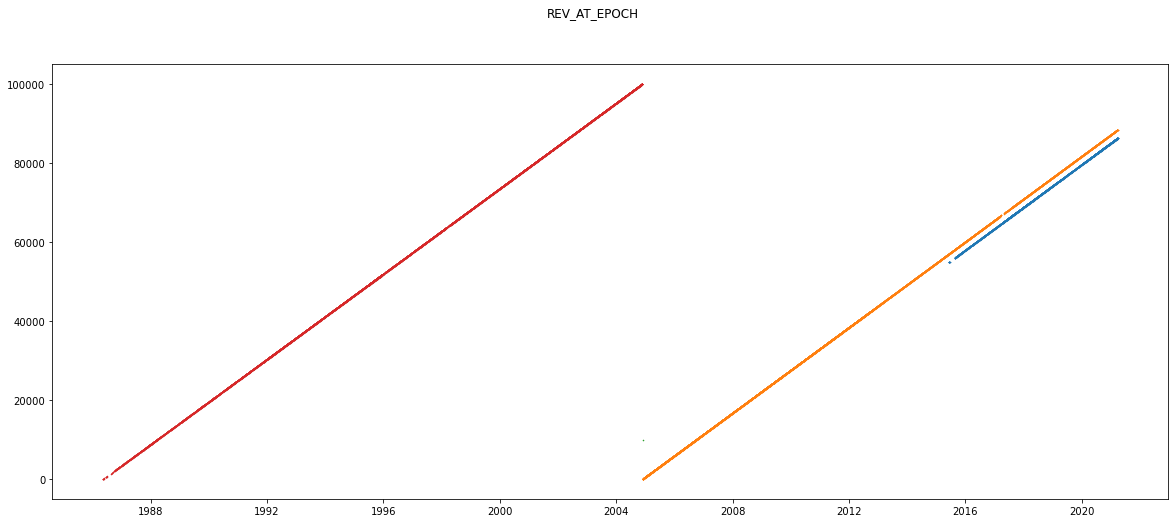

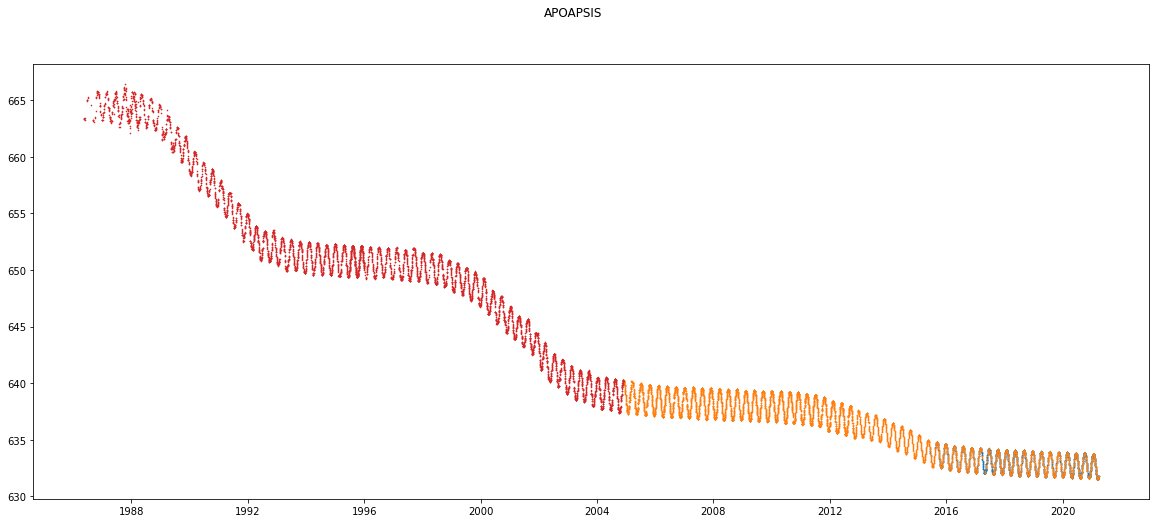

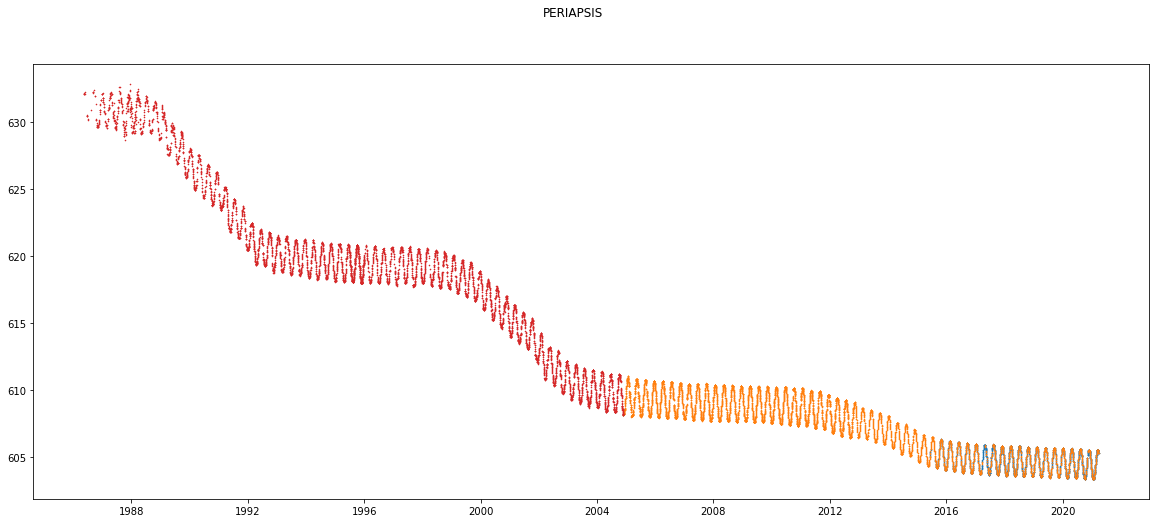

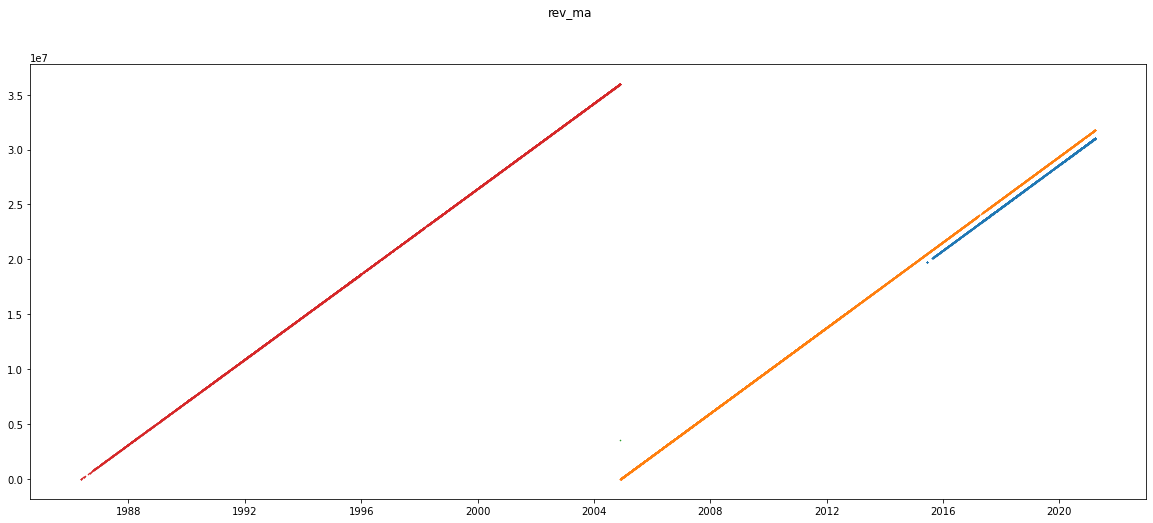

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

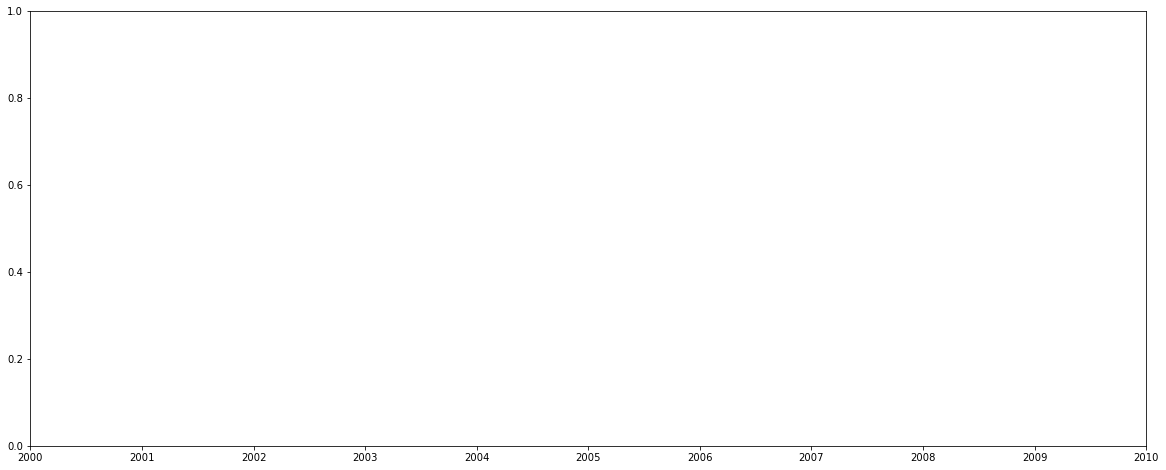

In [10]:
df3 = df[(df.NORAD_CAT_ID==nid) & (df.index > "1915")][columns].copy()

s = (((df3.rev_ma/360) / df3.MEAN_MOTION) - df3.index.astype(np.int64) / 10**9 / 60 / 60 / 24)

df3['bin'] = pd.cut(s, [-14000, -12840, -12500, -10000, -5000])

for col in df3.columns:
    p = plt.figure(figsize=(20, 8))
    for g,df4 in df3.groupby(by=["bin"]):
        ax = plt.scatter(df4.index,df4[col], marker="*", s=0.5, alpha=1)
        ax.figure.suptitle(col)
    plt.show()
#     p.savefig(f'./{nid}_{col}.png')

In [ ]:
for a,b in df[(df.index>"2004-11-25") & (df.index<"2004-11-28") & (df.NORAD_CAT_ID == nid)][['TLE_LINE2']].iterrows():
    print(b.TLE_LINE2)

In [ ]:
from sklearn.linear_model import LinearRegression

nid=16720
test_df = df[df.NORAD_CAT_ID==nid][columns]
test_df = test_df[(test_df.index > "2001-1-1") & (test_df.index < "2001-1-15")]
# plot_stuff(nid,test_df)

epoch = test_df.index.astype(np.int64).values.reshape(-1,1)
rev_ma = test_df.rev_ma.values.reshape(-1,1)

reg = LinearRegression().fit(epoch, rev_ma)
sim_x = np.linspace(epoch[0],epoch[-1],10000)
sim_y = reg.predict(sim_x)
sim_y1 = sim_y // 360
sim_y2 = sim_y % 360

sim_df = pd.DataFrame(zip(sim_x[:,0],sim_y1[:,0],sim_y2[:,0]),columns=["sim_x","sim_y1","sim_y2"])
sim_df["sim_y1"] = sim_df.sim_y1.astype(int)
# display(sim_df)

p = plt.figure(figsize=(20, 8))
for rev,rev_df in sim_df.groupby(by="sim_y1"):
    plt.plot(rev_df.sim_x.values.reshape(-1,1),rev_df.sim_y2.values.reshape(-1,1), alpha=0.5, color="grey")
ax.figure.suptitle("MEAN_ANOMALY from TLE vs predicted")
ax = plt.scatter(epoch,test_df["MEAN_ANOMALY"], marker="*", s=20, alpha=1)
plt.show()

In [ ]:
1.0
>>> reg.coef_
array([1., 2.])
>>> reg.intercept_
3.0000...
>>> reg.predict(np.array([[3, 5]]))
array([16.])